In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot
from matplotlib.font_manager import FontProperties
import seaborn as sns



df_all = pd.read_csv('toyota.csv', encoding='utf-8')
df_all

,AUTO_BRAND,AUTO_MODEL,AUTO_BUILD_YEAR,AUTO_MILAGE,AUTO_COLOR,AUTO_GAS_TYPE,AUTO_PRICE,AUTO_DISPLACEMENT,AUTO_CAR_CLASSIFICATION
0,TOYOTA,CHR,2019,19000,white,gas,798000,1200,RECREATION VEHICLE
1,TOYOTA,SIENNA,2019,3000,white,gas,650000,2500,RECREATION VEHICLE
2,TOYOTA,CAMRY,2016,20000,white,gas,598000,2000,SEDAN
3,TOYOTA,COROLLA,2020,7700,white,gas,580000,1800,HATCHBACK
4,TOYOTA,COROLLA,2017,102000,black,gas,558000,1800,HATCHBACK
...,...,...,...,...,...,...,...,...,...
5724,TOYOTA,COROLLA,2013,103000,white,gas,308000,1800,HATCHBACK
5725,TOYOTA,VIOS,2014,110000,silver,gas,298000,1500,SEDAN
5726,TOYOTA,YARIS,2009,60000,white,gas,178000,1500,HATCHBACK
5727,TOYOTA,YARIS,2016,85072,white,gas,368000,1500,HATCHBACK


In [2]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AUTO_BRAND               5729 non-null   object
 1   AUTO_MODEL               5729 non-null   object
 2   AUTO_BUILD_YEAR          5729 non-null   int64 
 3   AUTO_MILAGE              5729 non-null   int64 
 4   AUTO_COLOR               5729 non-null   object
 5   AUTO_GAS_TYPE            5729 non-null   object
 6   AUTO_PRICE               5729 non-null   int64 
 7   AUTO_DISPLACEMENT        5729 non-null   int64 
 8   AUTO_CAR_CLASSIFICATION  5729 non-null   object
dtypes: int64(4), object(5)
memory usage: 402.9+ KB


In [3]:
df_all["AUTO_COLOR"].unique()

array(['white', 'black', 'silver', 'red', 'gray', 'orange', 'purple',
       'brown', 'green', 'blue', 'yellow'], dtype=object)

In [4]:
df_all['AUTO_PRICE'].describe()

count    5.729000e+03
mean     4.015689e+05
std      2.523675e+05
min      2.000000e+04
25%      2.380000e+05
50%      3.680000e+05
75%      4.980000e+05
max      2.980000e+06
Name: AUTO_PRICE, dtype: float64

# 目標變數與數值型欄位的關係
## AUTO_PRICE

Skewness: 3.087580
Kurtosis: 19.284482
5729


C:\Users\JACK\anaconda3\envs\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


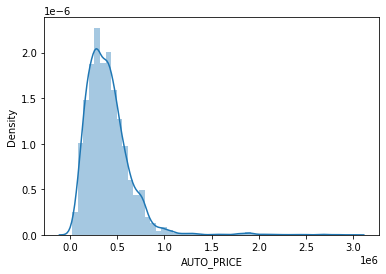

In [5]:
sns.distplot(df_all['AUTO_PRICE'])
#skewness and kurtosis
print("Skewness: %f" % df_all['AUTO_PRICE'].skew())
print("Kurtosis: %f" % df_all['AUTO_PRICE'].kurt())
print(len(df_all['AUTO_PRICE']))

<AxesSubplot:ylabel='AUTO_PRICE'>

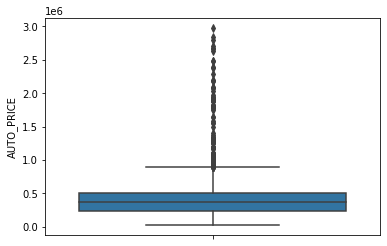

In [6]:
sns.boxplot( y="AUTO_PRICE", data=df_all)

Skewness: 0.5139277101373566
Kurtosis: -0.307265832253087
5578


C:\Users\JACK\anaconda3\envs\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


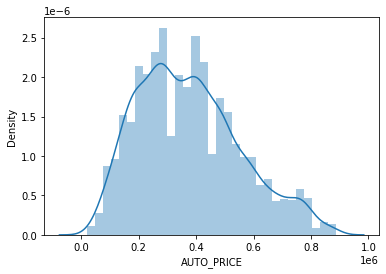

In [7]:
Q1 = df_all['AUTO_PRICE'].quantile(0.25)
Q3 = df_all['AUTO_PRICE'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_all['AUTO_PRICE'] >= Q1 - 1.5 * IQR) & (df_all['AUTO_PRICE'] <= Q3 + 1.5 *IQR)
df_all=df_all.loc[filter]  
sns.distplot(df_all['AUTO_PRICE'])
#skewness and kurtosis
print("Skewness: {}".format(df_all['AUTO_PRICE'].skew()))
print("Kurtosis: {}".format(df_all['AUTO_PRICE'].kurt()))
print(len(df_all['AUTO_PRICE']))



<AxesSubplot:ylabel='AUTO_PRICE'>

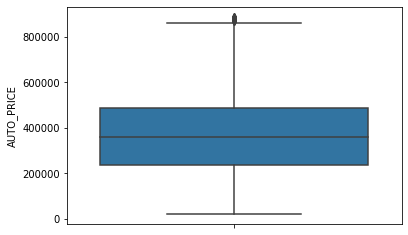

In [8]:
sns.boxplot( y="AUTO_PRICE", data=df_all)


# AUTO_BUILD_YEAR

<AxesSubplot:xlabel='AUTO_BUILD_YEAR', ylabel='AUTO_PRICE'>

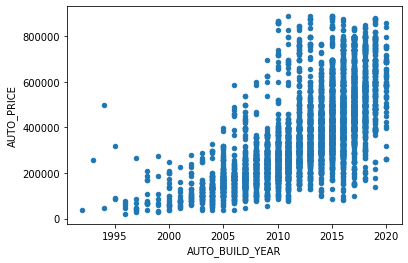

In [9]:
df_all.plot.scatter(x='AUTO_BUILD_YEAR', y='AUTO_PRICE')

# 離群職處理

Skewness: -0.6015325335992957
Kurtosis: -0.4265894852998571
5516


C:\Users\JACK\anaconda3\envs\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


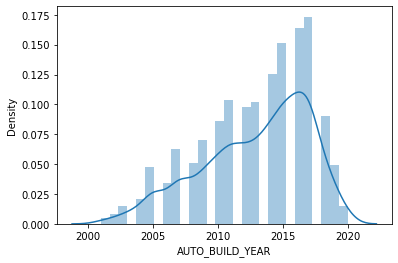

In [10]:
Q1 = df_all['AUTO_BUILD_YEAR'].quantile(0.25)
Q3 = df_all['AUTO_BUILD_YEAR'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_all['AUTO_BUILD_YEAR'] >= Q1 - 1.5 * IQR) & (df_all['AUTO_BUILD_YEAR'] <= Q3 + 1.5 *IQR)
df_all=df_all.loc[filter]  
sns.distplot(df_all['AUTO_BUILD_YEAR'])
#skewness and kurtosis
print("Skewness: {}".format(df_all['AUTO_BUILD_YEAR'].skew()))
print("Kurtosis: {}".format(df_all['AUTO_BUILD_YEAR'].kurt()))
print(len(df_all['AUTO_BUILD_YEAR']))

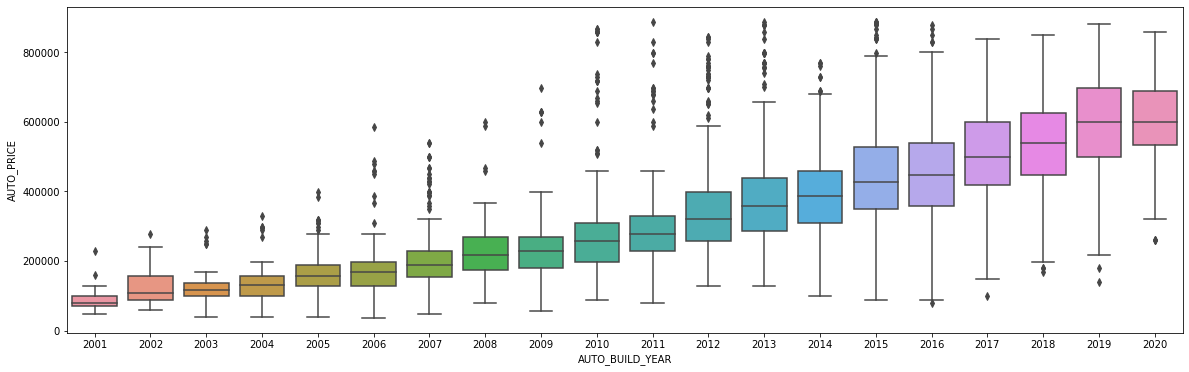

In [11]:
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='AUTO_BUILD_YEAR', y="AUTO_PRICE", data=df_all)
fig.axis();

<AxesSubplot:xlabel='AUTO_BUILD_YEAR', ylabel='AUTO_PRICE'>

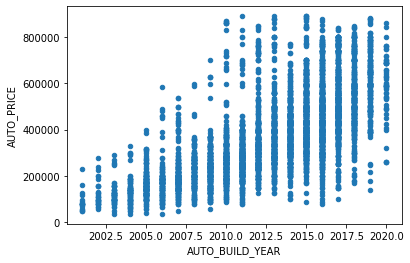

In [12]:
df_all.plot.scatter(x='AUTO_BUILD_YEAR', y='AUTO_PRICE')

# AUTO_MILAGE

In [13]:
df_all['AUTO_MILAGE']=df_all['AUTO_MILAGE'].apply(lambda x:int(x))
df_all['AUTO_MILAGE'].describe()

count      5516.000000
mean      98023.569797
std       61730.643096
min           1.000000
25%       50000.000000
50%       90000.000000
75%      131039.500000
max      617000.000000
Name: AUTO_MILAGE, dtype: float64

<AxesSubplot:xlabel='AUTO_MILAGE', ylabel='AUTO_PRICE'>

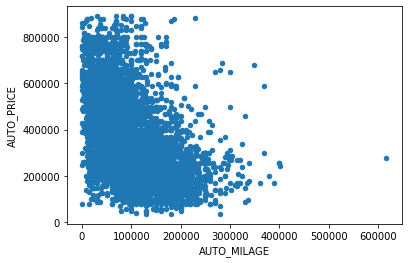

In [14]:
df_all.plot.scatter(x='AUTO_MILAGE', y='AUTO_PRICE')

C:\Users\JACK\anaconda3\envs\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AUTO_MILAGE', ylabel='Density'>

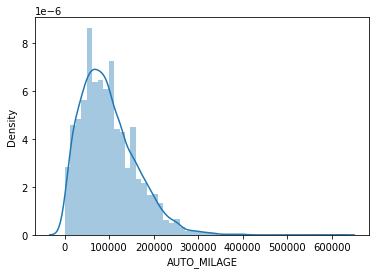

In [15]:
sns.distplot( df_all["AUTO_MILAGE"])

<AxesSubplot:ylabel='AUTO_MILAGE'>

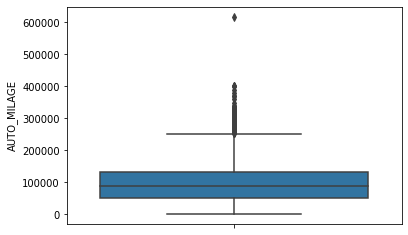

In [16]:
sns.boxplot( y="AUTO_MILAGE", data=df_all)

Skewness: 0.5675490627400951
Kurtosis: -0.31397035602604895
5425


C:\Users\JACK\anaconda3\envs\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


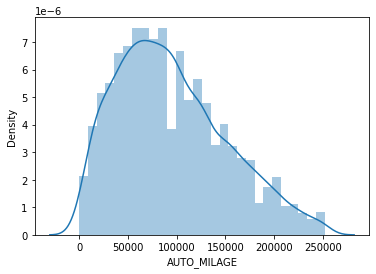

In [17]:
Q1 = df_all['AUTO_MILAGE'].quantile(0.25)
Q3 = df_all['AUTO_MILAGE'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_all['AUTO_MILAGE'] >= Q1 - 1.5 * IQR) & (df_all['AUTO_MILAGE'] <= Q3 + 1.5 *IQR)
df_all=df_all.loc[filter]  
sns.distplot(df_all['AUTO_MILAGE'])
#skewness and kurtosis
print("Skewness: {}".format(df_all['AUTO_MILAGE'].skew()))
print("Kurtosis: {}".format(df_all['AUTO_MILAGE'].kurt()))
print(len(df_all['AUTO_MILAGE']))

<AxesSubplot:xlabel='AUTO_MILAGE', ylabel='AUTO_PRICE'>

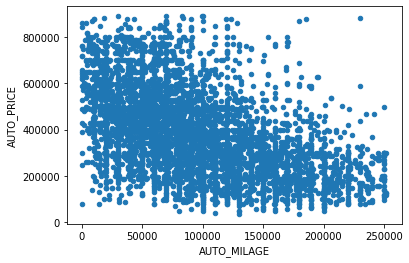

In [18]:
df_all.plot.scatter(x='AUTO_MILAGE', y='AUTO_PRICE')

# AUTO_DISPLACEMENT

In [19]:
df_all['AUTO_DISPLACEMENT']=df_all['AUTO_DISPLACEMENT'].apply(lambda x:int(x))
df_all['AUTO_DISPLACEMENT'].describe()

<ipython-input-19-efb1da8f408c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['AUTO_DISPLACEMENT']=df_all['AUTO_DISPLACEMENT'].apply(lambda x:int(x))


count    5425.000000
mean     1839.661751
std       274.346486
min      1200.000000
25%      1500.000000
50%      1800.000000
75%      2000.000000
max      4000.000000
Name: AUTO_DISPLACEMENT, dtype: float64

<AxesSubplot:ylabel='AUTO_DISPLACEMENT'>

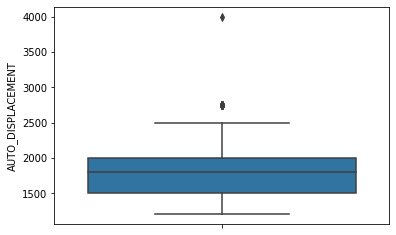

In [20]:
sns.boxplot( y="AUTO_DISPLACEMENT", data=df_all)

<AxesSubplot:xlabel='AUTO_DISPLACEMENT', ylabel='AUTO_PRICE'>

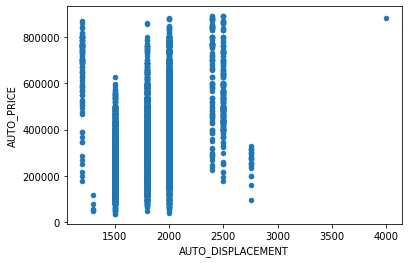

In [21]:
df_all.plot.scatter(x='AUTO_DISPLACEMENT', y='AUTO_PRICE')

In [22]:
df_all

,AUTO_BRAND,AUTO_MODEL,AUTO_BUILD_YEAR,AUTO_MILAGE,AUTO_COLOR,AUTO_GAS_TYPE,AUTO_PRICE,AUTO_DISPLACEMENT,AUTO_CAR_CLASSIFICATION
0,TOYOTA,CHR,2019,19000,white,gas,798000,1200,RECREATION VEHICLE
1,TOYOTA,SIENNA,2019,3000,white,gas,650000,2500,RECREATION VEHICLE
2,TOYOTA,CAMRY,2016,20000,white,gas,598000,2000,SEDAN
3,TOYOTA,COROLLA,2020,7700,white,gas,580000,1800,HATCHBACK
4,TOYOTA,COROLLA,2017,102000,black,gas,558000,1800,HATCHBACK
...,...,...,...,...,...,...,...,...,...
5724,TOYOTA,COROLLA,2013,103000,white,gas,308000,1800,HATCHBACK
5725,TOYOTA,VIOS,2014,110000,silver,gas,298000,1500,SEDAN
5726,TOYOTA,YARIS,2009,60000,white,gas,178000,1500,HATCHBACK
5727,TOYOTA,YARIS,2016,85072,white,gas,368000,1500,HATCHBACK


# 目標變數與類別型的欄位

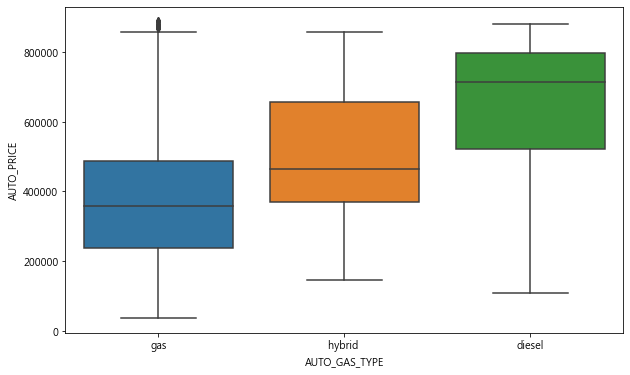

In [23]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='AUTO_GAS_TYPE', y="AUTO_PRICE", data=df_all)
fig.axis();

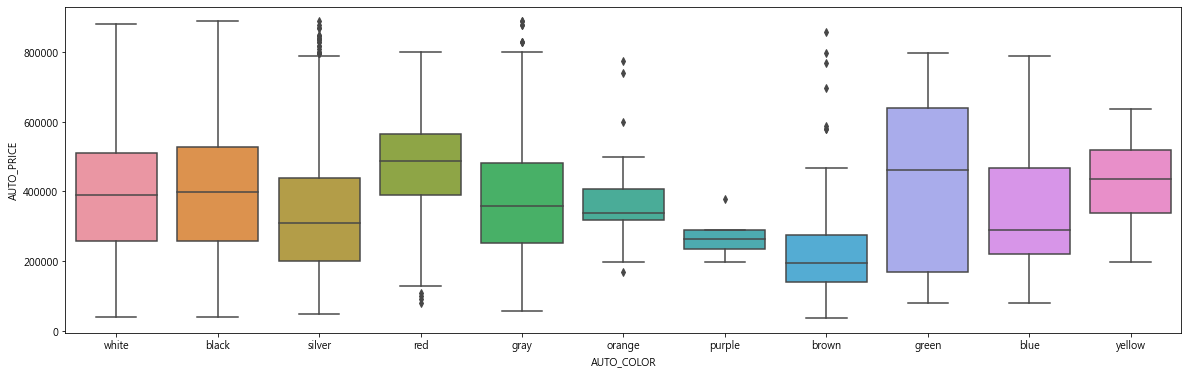

In [24]:
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='AUTO_COLOR', y="AUTO_PRICE", data=df_all)
fig.axis();

<AxesSubplot:xlabel='index', ylabel='AUTO_COLOR'>

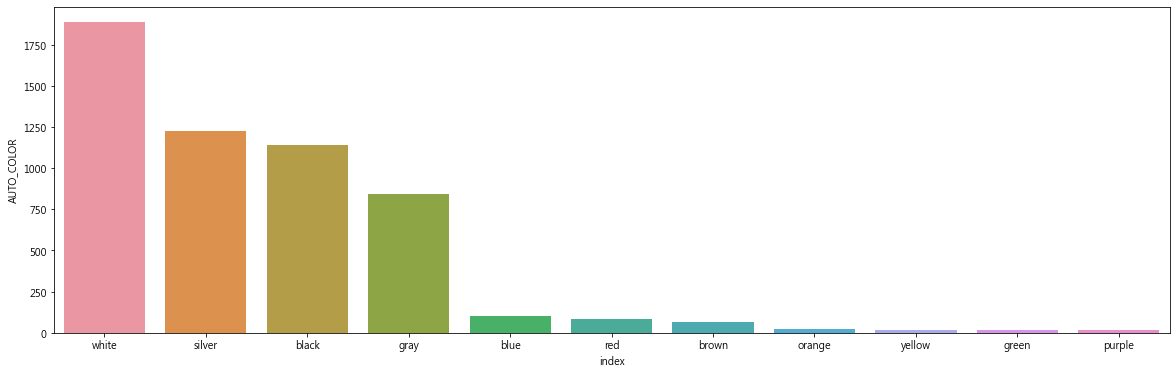

In [25]:
df_color_f=pd.DataFrame(df_all['AUTO_COLOR'].value_counts()).reset_index(inplace=False)
f, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x="index", y="AUTO_COLOR", data=df_color_f, capsize=.2)

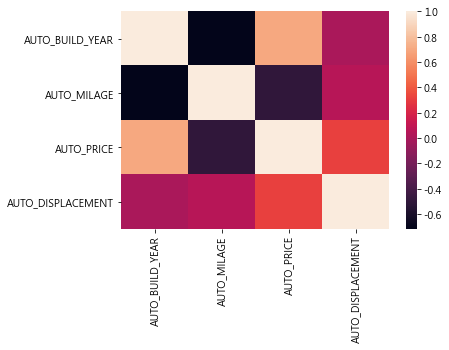

In [26]:
# corrmat = df_all.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, square=True)
corr = df_all.corr()
sns.heatmap(corr)
plt.show()

In [27]:
df_all.to_csv('./toyota_1.csv', index=False, encoding='utf-8')

# 建立回歸模型


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing



df_train = pd.read_csv('toyota_1.csv', encoding='utf-8')


df_train = pd.get_dummies(df_train) #one-hot encoding

df_train.to_csv('./df_train.csv', index=False, encoding='utf-8')


df_train

,AUTO_BUILD_YEAR,AUTO_MILAGE,AUTO_PRICE,AUTO_DISPLACEMENT,AUTO_BRAND_TOYOTA,AUTO_MODEL_86,AUTO_MODEL_ALPHARD,AUTO_MODEL_ALTIS,AUTO_MODEL_AURIS,AUTO_MODEL_CAMRY,...,AUTO_COLOR_yellow,AUTO_GAS_TYPE_diesel,AUTO_GAS_TYPE_gas,AUTO_GAS_TYPE_hybrid,AUTO_CAR_CLASSIFICATION_COUPE,AUTO_CAR_CLASSIFICATION_HATCHBACK,AUTO_CAR_CLASSIFICATION_MINIVAN,AUTO_CAR_CLASSIFICATION_RECREATION VEHICLE,AUTO_CAR_CLASSIFICATION_SEDAN,AUTO_CAR_CLASSIFICATION_TRUCK
0,2019,19000,798000,1200,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2019,3000,650000,2500,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016,20000,598000,2000,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,2020,7700,580000,1800,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2017,102000,558000,1800,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,2013,103000,308000,1800,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5421,2014,110000,298000,1500,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5422,2009,60000,178000,1500,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5423,2016,85072,368000,1500,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [29]:
df_train.dropna(inplace=True)
# load csv file


y = df_train['AUTO_PRICE']
X = df_train.drop(columns=['AUTO_PRICE'])




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


model = linear_model.LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(y_test, y_pred)))                           

Coefficients: [ 1.16990656e+05 -3.96561726e+03 -4.52866721e+17  2.17268683e+17
 -2.01908453e+17  8.20887860e+16 -3.47889992e+17 -1.23289160e+17
 -3.74820672e+17  5.73028914e+16  1.40508860e+17  5.68064873e+17
  4.69647258e+17  2.81401805e+17 -2.64567030e+16  3.33414802e+17
  4.57201241e+16  4.98160320e+17  5.15933009e+17 -7.10918761e+16
 -5.49109150e+17 -3.13701920e+17 -4.89627998e+16  1.64205364e+17
  4.90115479e+17  1.57912685e+17  1.34414948e+17  4.36132103e+17
  6.86079194e+16  8.04003021e+16  6.64361578e+16  1.48602763e+17
  4.99072193e+17  5.72267397e+17  7.47406965e+16 -1.46187242e+16
 -1.32219426e+17 -1.31494090e+17  2.69157044e+17 -6.11875714e+16
 -4.50028270e+17 -4.83903403e+17  8.00560401e+17 -4.14439732e+17]

Mean squared error: 8166652293.893594
R2 score: 0.7426388303537417


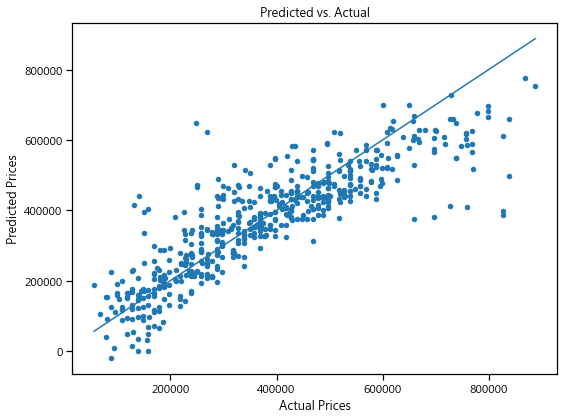

In [30]:
sns.set_context("notebook", font_scale=1.0)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

# 建立多種模型

In [41]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


df_train = pd.read_csv('df_train.csv', encoding='utf-8')


y = df_train['AUTO_PRICE']
X = df_train.drop(columns=['AUTO_PRICE'])
def find_best_model_using_gridsearchcv(df3_inputs,df3_target):
    algos = {
        'linear_regression' : {
            'model': linear_model.LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [100]
           }
        },
        'XGboost':{
            'model': XGBRegressor(),
            'params':{
                'max_depth':[10],
                'learning_rate':[0.01],
                'n_estimators':[1000]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(df3_inputs,df3_target)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
result=find_best_model_using_gridsearchcv(X,y)
result

C:\Users\JACK\anaconda3\envs\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17889800952798.555, tolerance: 13665669524.792633
  model = cd_fast.enet_coordinate_descent(
C:\Users\JACK\anaconda3\envs\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18017700078505.277, tolerance: 13632986515.299541
  model = cd_fast.enet_coordinate_descent(
C:\Users\JACK\anaconda3\envs\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17297613930528.764, tolerance: 13731429566.912445
  model = cd_fast.enet_coordinate_descent(
C:\Users\JACK\anaconda3\envs\Python38\lib\site-packages\sklearn\

,model,best_score,best_params
0,linear_regression,0.720903,{'normalize': False}
1,lasso,0.720993,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.711680,"{'criterion': 'mse', 'splitter': 'random'}"
3,Random_forest,0.794062,"{'max_features': 'auto', 'n_estimators': 100}"
4,XGboost,0.799545,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es..."


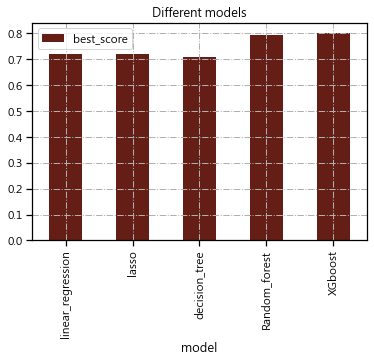

In [32]:
result_map=result.drop(['best_params'],axis='columns')
result_map.plot(x="model",y='best_score',kind='bar',color='#641E16',title='Different models')
plt.grid(linestyle='-.')

# 對價格取LOG

In [33]:
df_final_zero_v2=pd.read_csv('df_train.csv',encoding='utf-8-sig')
df_final_zero_v2["AUTO_PRICE"]=df_final_zero_v2["AUTO_PRICE"].apply(lambda x: np.log1p(x))
df_final_zero_v2.to_csv('./df_final_zero_v2.csv', index=False, encoding='utf-8')
df_final_zero_v2

,AUTO_BUILD_YEAR,AUTO_MILAGE,AUTO_PRICE,AUTO_DISPLACEMENT,AUTO_BRAND_TOYOTA,AUTO_MODEL_86,AUTO_MODEL_ALPHARD,AUTO_MODEL_ALTIS,AUTO_MODEL_AURIS,AUTO_MODEL_CAMRY,...,AUTO_COLOR_yellow,AUTO_GAS_TYPE_diesel,AUTO_GAS_TYPE_gas,AUTO_GAS_TYPE_hybrid,AUTO_CAR_CLASSIFICATION_COUPE,AUTO_CAR_CLASSIFICATION_HATCHBACK,AUTO_CAR_CLASSIFICATION_MINIVAN,AUTO_CAR_CLASSIFICATION_RECREATION VEHICLE,AUTO_CAR_CLASSIFICATION_SEDAN,AUTO_CAR_CLASSIFICATION_TRUCK
0,2019,19000,13.589865,1200,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2019,3000,13.384729,2500,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016,20000,13.301348,2000,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,2020,7700,13.270785,1800,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2017,102000,13.232116,1800,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,2013,103000,12.637858,1800,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5421,2014,110000,12.604852,1500,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5422,2009,60000,12.089544,1500,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5423,2016,85072,12.815841,1500,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

df_final_zero_v2.dropna(inplace=True)
# load csv file


y = df_final_zero_v2['AUTO_PRICE']
X = df_final_zero_v2.drop(columns=['AUTO_PRICE'])




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(y_test, y_pred)))

Coefficients: [ 4.05056018e-01  1.79055411e-02 -1.18118418e+12  4.32795429e+11
 -2.94775985e+11  1.40928823e+11  5.75520745e+10  1.26096597e+11
  3.83355771e+11 -1.61627813e+11  1.30497899e+12  1.43476507e+12
  1.34372720e+12  3.64263342e+11  2.70591528e+10  5.51979653e+11
  4.24626615e+11  6.44848541e+11  8.85746215e+11 -6.14311771e+10
 -3.07501450e+11  3.20845275e+11  7.08073994e+11  1.62118395e+11
  1.39627831e+12  4.49873685e+11  3.82931542e+11  1.24248635e+12
  1.95455466e+11  2.29050504e+11  1.89268386e+11  4.23350870e+11
  1.42179488e+12  1.63031895e+12  2.12926989e+11 -4.44399396e+10
 -4.01938171e+11 -3.99733200e+11  8.31359647e+11  1.37032113e+11
 -9.30804845e+11  8.98387107e+11  1.65457373e+12 -1.15685397e+12]

Mean squared error: 0.06501643789743095
R2 score: 0.7710141424494326


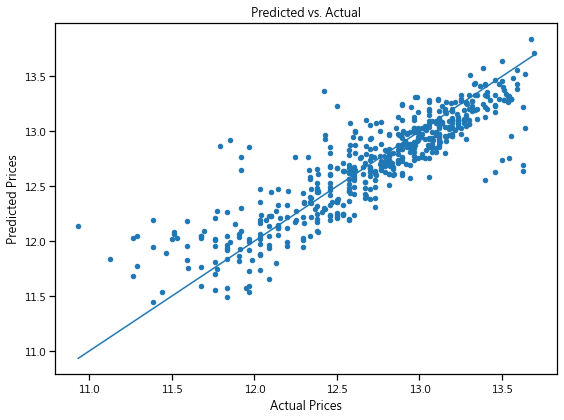

In [43]:
sns.set_context("notebook", font_scale=1.0)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

In [44]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


df_train = pd.read_csv('df_final_zero_v2.csv', encoding='utf-8')


y = df_train['AUTO_PRICE']
X = df_train.drop(columns=['AUTO_PRICE'])
def find_best_model_using_gridsearchcv(df3_inputs,df3_target):
    algos = {
        'linear_regression' : {
            'model': linear_model.LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [100]
           }
        },
        'XGboost':{
            'model': XGBRegressor(),
            'params':{
                'max_depth':[10],
                'learning_rate':[0.01],
                'n_estimators':[1000]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(df3_inputs,df3_target)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
result=find_best_model_using_gridsearchcv(X,y)
result


,model,best_score,best_params
0,linear_regression,0.756290,{'normalize': False}
1,lasso,0.370737,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.663136,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Random_forest,0.765856,"{'max_features': 'auto', 'n_estimators': 100}"
4,XGboost,0.783895,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es..."
